In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/silkieMoth/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


1. The NY spills incident dataset contains records of various hazardous material spills. It contains data on when, why, where, and how a spill happened, as well as what substance spilled and it's widespread effect. The dataset began collection in 1978, but includes records prior. Data collected based on reports from spiller. Records are otherwise unverified and could be inacurate. Dataset created on 10/19/2015, last updated on 11/3/2024, and accessed on 11/3/2024.

2. The 2023 TIGER/Line shapefiles contain boundaries for various municipalities within the United States and it's surrounding territories, as of 2023. The 'counties' version groups all municipalities by county. The polygons contained within also contain other attribute information, such as names and hydrography. Dataset last modified on 11/22/2023, and date accessed is 11/3/2024. 

## 3. Import libraries

In [2]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

# Set project to source from anaconda folder 
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Create file path variables
fp_spills = os.path.join('/', 'Users', 'jpcohen', 'EDS-220', 'eds220-hwk3', 'data', 'Spill_Incidents_20241103.csv')
fp_counties = os.path.join('/', 'Users', 'jpcohen', 'EDS-220', 'eds220-hwk3', 'data', 'tl_2023_us_county', 'tl_2023_us_county.shp')

# Import all data
spills = pd.read_csv(fp_spills)
counties = gpd.read_file(fp_counties)


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [4]:
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [6]:
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

Firstly, the dataset has many NA values in places that may make analysis difficult, such as the zip code, water body, and unit columns. Secondly, the date columns are in string format, although this can be easily fixed with `pd.to_datetime`. Furthermore, there is troublesome whitespace in both the values and column names of the dataset, and the `County` column doesn't have consistently formatted values. Some have a specific county, while some give a less specific region containing multiple counties. 

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [8]:
# change columns to all lowercase & replace whitespace with '_'
spills.columns = spills.columns.str.lower().str.replace(' ', '_')

In [9]:
# Make 'spill_date', 'received_date', and 'close_date' datetime format
spills[['spill_date', 'received_date', 'close_date']] = spills[['spill_date', 'received_date', 'close_date']].apply(pd.to_datetime)

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# Filter for petrol based spills within dates 01/01/2023 - 10/31/2023
petr_23 = spills[(spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] <= '2023-10-31')].loc[spills['material_family'] == 'Petroleum']

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [11]:
# Display min and max day/month
print(f"Minimum month/year: {petr_23['spill_date'].dt.month.min()}/{petr_23['spill_date'].dt.year.min()}")
print(f"Maximum month/year: {petr_23['spill_date'].dt.month.max()}/{petr_23['spill_date'].dt.year.max()}")

Minimum month/year: 1/2023
Maximum month/year: 10/2023


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [12]:
# Pass if only includes petrol based spills
assert petr_23['material_family'].unique() == 'Petroleum'

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [13]:
# Get total spills by county
spills_per_county = (petr_23.groupby('county')
                     .size()
                     .reset_index()
                     .rename(columns = {'county': 'county', 0: 'n_spills'}))
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

Extra: checking number of unique values in each column, check if CRS is geographic.

In [14]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [15]:
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [16]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

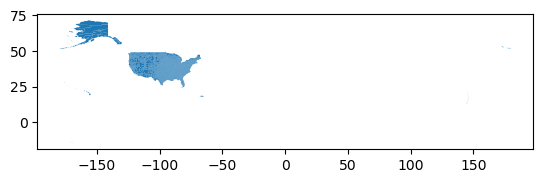

In [17]:
counties.plot()

In [18]:
counties.nunique()

STATEFP       56
COUNTYFP     333
COUNTYNS    3235
GEOID       3235
GEOIDFQ     3235
NAME        1927
NAMELSAD    1973
LSAD          12
CLASSFP        5
MTFCC          1
CSAFP        184
CBSAFP       935
METDIVFP      37
FUNCSTAT       7
ALAND       3235
AWATER      3235
INTPTLAT    3235
INTPTLON    3235
geometry    3235
dtype: int64

In [19]:
[f'Is geographic: {counties.crs.is_geographic}',
f'Is projected: {counties.crs.is_projected}']

['Is geographic: True', 'Is projected: False']

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

Columns `INTPTLAT` and `INTPTLON`, the latitude and longtitude columns, are string types but may be worth converting to a `int` type. Furthermore, the CRS is not WGS 1984, it's NAD83. This is likely fine because it's still geographic, but I might consider changing if necessary. Furthermore, the geodataframe encompasses all of the U.S. and it's surrounding territories.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [20]:
# Rename columns
counties = counties.rename(columns = {'STATEFP': 'state_fips',
                                 'COUNTYFP': 'county_fips',
                                 'COUNTYNS': 'country_feature_code',
                                 'NAME': 'county',
                                 'NAMELSAD': 'county_formatted',
                                 'LSAD': 'county_code',
                                 'METDIVFP': 'metro_div_code',
                                 'FUNCSTAT': 'func_status',
                                 'ALAND': 'land_area',
                                 'AWATER': 'water_area',
                                 'INTPTLAT': 'internal_lat',
                                 'INTPTLON': 'internal_long'
                                 })
counties.head()

,state_fips,county_fips,country_feature_code,GEOID,GEOIDFQ,county,county_formatted,county_code,CLASSFP,MTFCC,CSAFP,CBSAFP,metro_div_code,func_status,land_area,water_area,internal_lat,internal_long,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

Text(0.5, 1.0, 'NY Counties')

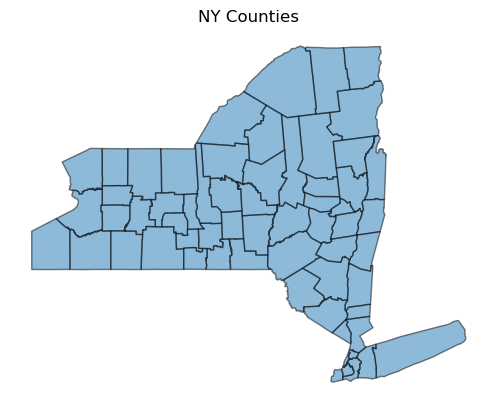

In [21]:
# Filter for all NY counties
ny_counties = counties[counties['state_fips'] == '36']

# Init plt
fig, ax = plt.subplots()

# Remove axes
ax.axis('off')

# Plot county polygons
ny_counties.plot(ax = ax,
                edgecolor = 'black',
                alpha = 0.5)

# Set title
ax.set_title('NY Counties')

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [22]:
# Fetch all county values in NY county shapefile
for i in list(range(len(ny_counties))):
    print(f"{ny_counties['county_formatted'].sort_values().unique()[i]}")

Albany County
Allegany County
Bronx County
Broome County
Cattaraugus County
Cayuga County
Chautauqua County
Chemung County
Chenango County
Clinton County
Columbia County
Cortland County
Delaware County
Dutchess County
Erie County
Essex County
Franklin County
Fulton County
Genesee County
Greene County
Hamilton County
Herkimer County
Jefferson County
Kings County
Lewis County
Livingston County
Madison County
Monroe County
Montgomery County
Nassau County
New York County
Niagara County
Oneida County
Onondaga County
Ontario County
Orange County
Orleans County
Oswego County
Otsego County
Putnam County
Queens County
Rensselaer County
Richmond County
Rockland County
Saratoga County
Schenectady County
Schoharie County
Schuyler County
Seneca County
St. Lawrence County
Steuben County
Suffolk County
Sullivan County
Tioga County
Tompkins County
Ulster County
Warren County
Washington County
Wayne County
Westchester County
Wyoming County
Yates County


In [23]:
# Fetch all county values in chemical spill dataset
for i in list(range(len(spills_per_county))):
    print(f"{spills_per_county['county'].sort_values().unique()[i]}")

Albany
Allegany
Bronx
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Chenango
Clinton
Columbia
Cortland
Delaware
Dutchess
Erie
Essex
Franklin
Fulton
Genesee
Greene
Hamilton
Herkimer
Jefferson
Kings
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
New Jersey - Region 2
New York
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Queens
Rensselaer
Richmond
Rockland
Saratoga
Schenectady
Schoharie
Schuyler
Seneca
St Lawrence
Steuben
Suffolk
Sullivan
Tioga
Tompkins
Tuscarora Indian Reservation
Ulster
Warren
Washington
Wayne
Westchester
Wyoming
Yates




c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [24]:
# Get county values in spill dataset not in shapefile
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['county']).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [25]:
# Get county values in shapefile not in spill dataset
diff_names_ny = np.setdiff1d(ny_counties['county'], spills_per_county['county']).tolist()
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [26]:
# Print number of spills at Tuscarora Indian Reservation
print("Number of spills at Tuscarora Indian Reservation = ", int(spills_per_county[spills_per_county["county"] == "Tuscarora Indian Reservation"]["n_spills"]))

Number of spills at Tuscarora Indian Reservation =  1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [27]:
# Update 'St Lawrence' value in spills dataset to match shapefile
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', ['county']] = 'St. Lawrence'

# Test county value was updated
assert spills_per_county[spills_per_county['county'].str.contains('Lawrence')]['county'].values[0] == ny_counties[ny_counties['county'].str.contains('Lawrence')]['county'].values[0]

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [28]:
# There are no updates necessary for an inner join

In [29]:
# Perform inner join with spill dataset onto shapefile
ny_counties = ny_counties.merge(spills_per_county, on='county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [30]:
# Create immutable variable for initial number of spills in Niagara
prev_niag = ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills']

# Add one spill to 'Niagara' county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

# Test shapefile was updated correctly
assert ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'].values[0] == prev_niag.values[0] + 1

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



<AxesSubplot:title={'center':'Total Petroleum Spills by County in New York'}>

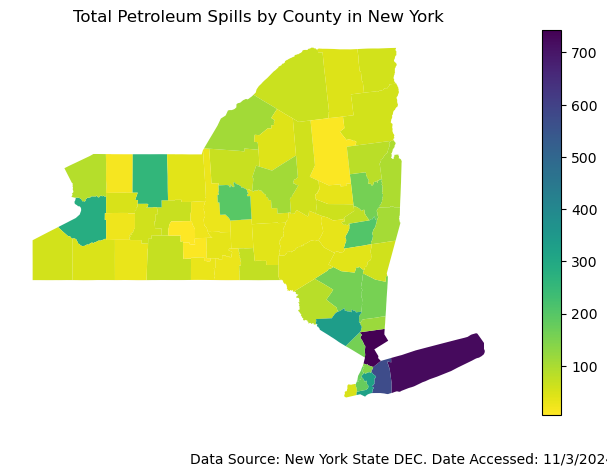

In [31]:
# Initialize plot and axes and update figure size
fig, ax = plt.subplots(figsize=(9, 5))

# Remove axes
ax.axis('off')

ax.set_title('Total Petroleum Spills by County in New York')

# Add annotation to bottom right corner
ax.annotate('Data Source: New York State DEC. Date Accessed: 11/3/2024', (190,10), xycoords = 'figure pixels')

ny_counties.plot(ax = ax,
                column = 'n_spills',
                legend = True,
                cmap = 'viridis_r') # Reverse viridis


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

Overall, most of the spills in the state happen in the southern, more urban parts of the state, near NYC, Newark, and Long Island. The counties encompassing this area are our top three in terms of the total number of spills, Westchester, Suffolk, and Nassau. Also notable are Orange and Queens counties which fall in the same area, Erie and Monroe counties which are lake communities, and Albany County, which is urban and the capital of the state.

In [32]:
# Get top 8 total petrol spills by county
ny_counties.sort_values('n_spills', ascending = False).head(8)

,state_fips,county_fips,country_feature_code,GEOID,GEOIDFQ,county,county_formatted,county_code,CLASSFP,MTFCC,CSAFP,CBSAFP,metro_div_code,func_status,land_area,water_area,internal_lat,internal_long,geometry,n_spills
23,36,119,00974157,36119,0500000US36119,Westchester,Westchester County,06,H1,G4020,408,35620,35614,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985...",743
8,36,103,00974149,36103,0500000US36103,Suffolk,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",723
20,36,059,00974128,36059,0500000US36059,Nassau,Nassau County,06,H1,G4020,408,35620,35004,A,736960644,437290665,+40.7296118,-073.5894144,"POLYGON ((-73.78019 40.82640, -73.77498 40.830...",576
59,36,071,00974134,36071,0500000US36071,Orange,Orange County,06,H1,G4020,408,28880,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",336
42,36,081,00974139,36081,0500000US36081,Queens,Queens County,06,H6,G4020,408,35620,35614,C,281594053,188444349,+40.6546581,-073.8412089,"POLYGON ((-74.03813 40.53829, -74.03749 40.542...",321
28,36,029,00974113,36029,0500000US36029,Erie,Erie County,06,H1,G4020,160,15380,None,A,2700743427,476876396,+42.7527590,-078.7781922,"POLYGON ((-78.77760 42.46188, -78.77756 42.461...",283
37,36,055,00974126,36055,0500000US36055,Monroe,Monroe County,06,H1,G4020,464,40380,None,A,1701477039,1838269506,+43.2503466,-077.7005177,"POLYGON ((-77.63502 42.94446, -77.63552 42.943...",257
13,36,001,00974099,36001,0500000US36001,Albany,Albany County,06,H1,G4020,104,10580,None,A,1354273423,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441...",205
